In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
file_path =r'C:\Users\DELL\Desktop\EDA作业\data.xlsx'  # 数据导入
df = pd.read_excel(file_path)

In [4]:
df.head()

,DATE,ULSP: Pump price (p/litre),Duty rate,VAT,OPEC,OPEC1week,OPEC1month,CrudeOil,CrudeOil1week,CrudeOil1month,...,Average rainfall,Average temperatures,Carbon budget,Wind Sum,Solar Sum,gasprice,GDP Growth,Inflation Rate,Unemployment Rate,Total annual registrations
0,2013-01-07,131.860715,45.82,17.5,108.15,108.00,108.00,93.56,93.00,93.00,...,155.505595,3.925576,2782,800153.25,79.25,3.327,0.0182,0.0229,0.0752,43552.634615
1,2013-01-14,132.000415,45.82,17.5,108.06,108.15,108.00,95.56,93.56,93.00,...,155.505595,3.925576,2782,800153.25,79.25,3.566,0.0182,0.0229,0.0752,43552.634615
2,2013-01-21,132.213910,45.82,17.5,109.32,108.06,108.00,95.88,95.56,93.00,...,155.505595,3.925576,2782,800153.25,79.25,3.444,0.0182,0.0229,0.0752,43552.634615
3,2013-01-28,132.949500,45.82,17.5,110.15,109.32,108.00,97.77,95.88,93.00,...,155.505595,3.925576,2782,800153.25,79.25,3.301,0.0182,0.0229,0.0752,43552.634615
4,2013-02-04,134.380516,45.82,17.5,112.99,110.15,108.15,95.72,97.77,93.56,...,64.705234,3.381378,2782,667825.75,245.50,3.272,0.0182,0.0229,0.0752,43552.634615


In [5]:
X = df[['Duty rate ','VAT ','OPEC ','OPEC1week','OPEC1month','CrudeOil','CrudeOil1week','CrudeOil1month','BCrudeOil','BCrudeOil1week','BCrudeOil1month','GDPUSD','GDPEUR','GDPCNY','GDPJPY','Average  rainfall ','Average temperatures','Carbon budget','Wind Sum','Solar Sum','gasprice','GDP Growth','Inflation Rate','Unemployment Rate','Total annual registrations']]
y = df[' ULSP:  Pump price (p/litre)']

In [6]:
df['Month'] = df['DATE'].dt.month


In [7]:
train_data = df[df['Month'] <= 10]
test_data = df[df['Month'] > 10]

X_train = train_data[['Duty rate ','VAT ','OPEC ','OPEC1week','OPEC1month','CrudeOil','CrudeOil1week','CrudeOil1month','BCrudeOil','BCrudeOil1week','BCrudeOil1month','GDPUSD','GDPEUR','GDPCNY','GDPJPY','Average  rainfall ','Average temperatures','Carbon budget','Wind Sum','Solar Sum','gasprice','GDP Growth','Inflation Rate','Unemployment Rate','Total annual registrations']]
y_train = train_data[' ULSP:  Pump price (p/litre)']
X_test = test_data[['Duty rate ','VAT ','OPEC ','OPEC1week','OPEC1month','CrudeOil','CrudeOil1week','CrudeOil1month','BCrudeOil','BCrudeOil1week','BCrudeOil1month','GDPUSD','GDPEUR','GDPCNY','GDPJPY','Average  rainfall ','Average temperatures','Carbon budget','Wind Sum','Solar Sum','gasprice','GDP Growth','Inflation Rate','Unemployment Rate','Total annual registrations']]
y_test = test_data[' ULSP:  Pump price (p/litre)']

In [8]:
model = LinearRegression()

In [9]:
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)

In [14]:
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [17]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2_linear = r2_score(y_test, y_pred)
print(f'Linear Regression - R²: {r2_linear}')
mape_linear = calculate_mape(y_test, y_pred)
print(f'Linear Regression - MAPE: {mape_linear:.2f}%')

Mean Squared Error: 11.608166969573652
Linear Regression - R²: 0.9495320128610832
Linear Regression - MAPE: 1.83%


In [18]:
assert X_test.shape[0] == len(y_test)

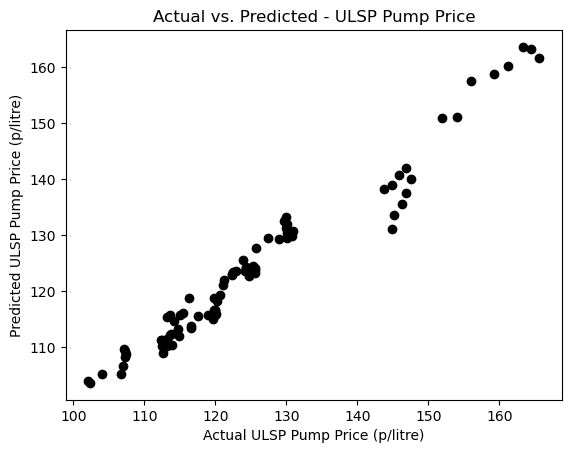

In [19]:
plt.scatter(y_test, y_pred, color='black')
plt.title('Actual vs. Predicted - ULSP Pump Price')
plt.xlabel('Actual ULSP Pump Price (p/litre)')
plt.ylabel('Predicted ULSP Pump Price (p/litre)')
plt.show()

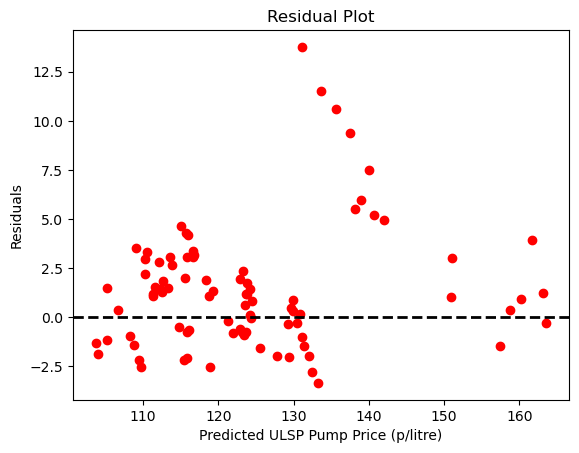

In [20]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='red')
plt.title('Residual Plot')
plt.xlabel('Predicted ULSP Pump Price (p/litre)')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.show()